# **BLIP model finetuing**

**Datasets used**



*   [Control Net Deep Fashion](https://huggingface.co/datasets/ldhnam/deepfashion_controlnet)
*   [Deep Fashion with masks](https://huggingface.co/datasets/SaffalPoosh/deepFashion-with-masks)



# Install Dependences



In [1]:
from huggingface_hub import notebook_login
notebook_login()

In [2]:
!pip install transformers
!pip install datasets
!pip install 'transformers[torch]'
!pip install 'transformers[tf-cpu]'
!pip install 'transformers[flax]'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.6/536.6 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 23.0 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 10.0.1
    Uninstalling pyarrow-10.0.1:
      Successfully uninstalled pyarrow-10.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ibis-framework 7.1.0 requires pyarrow<15,>=2, but you have pyarrow 15.0.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.2/198.2 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 12.6 MB/s eta 0:0

**Testing the imports**

**Loading the datasets**

In [3]:
from datasets import load_dataset

In [4]:
saffal_possh_df = load_dataset("SaffalPoosh/deepFashion-with-masks")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/40658 [00:00<?, ? examples/s]

In [5]:
# Checking a simple sample from the dataset
for data in saffal_possh_df.items():
  print(data[1]["gender"])
  print(data[1]["cloth_type"])
  print(data[1]["caption"])


['WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'MEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'MEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'MEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'MEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'MEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'MEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'MEN', 'WOMEN', 'MEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'MEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'MEN', 'WOMEN', 'WOMEN', 'WOMEN', 'MEN', 'MEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'MEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'WOMEN', 'MEN', 'WOMEN', 'WOMEN', 'MEN', 'WO

In [6]:
control_net_deep_fashion = load_dataset("ldhnam/deepfashion_controlnet")

Generating train split:   0%|          | 0/13670 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/9 [00:00<?, ? examples/s]

In [7]:
# Checking a simple sample from the dataset
for data in control_net_deep_fashion.items():
  print(data[1]["caption"])


['a woman wearing a black shirt and jeans stands in front of a white background', 'a pregnant woman in a blue top and jeans poses for a picture in front of a white background', 'a woman wearing a white t - shirt with a painting on it in front of a white background', 'a woman wearing a black top and tan pants in front of a white background', "a woman wearing a white t - shirt with a heart and the word d'day printed on in front of a white background", 'a woman in a blue and white shirt and jeans in front of a white background', 'a woman in black pants and a polka dot blouse in front of a white background', 'a woman in a black top and blue jeans is looking down in front of a white background', 'a woman wearing a navy top and yellow pants in front of a white background', 'a woman wearing a black top and a tan skirt in front of a white background', 'a woman wearing a white crop top with a red slogan in front of a white background', 'a woman wearing a pink shirt with a heart and arrow on it 

# **Pseudo-label and Pseudo-Questions**



In [8]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM


tokenizer = AutoTokenizer.from_pretrained("potsawee/t5-large-generation-squad-QuestionAnswer")
model = AutoModelForSeq2SeqLM.from_pretrained("potsawee/t5-large-generation-squad-QuestionAnswer")

tokenizer_config.json:   0%|          | 0.00/2.35k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/21.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.23k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.48k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.95G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

In [9]:
from tqdm import tqdm
import numpy as np

action_key_words = ["in", "wearing", "standing", "is wearing",
                      "posing", "sitting", "walking", "carrying",
                      "leaning"]

# creating pseudo questions
def create_pseudo_questions_for_saffal_possh(data, size=200):
  dataset_selection = data["train"][0: size]
  questions = []
  answers = []
  images = []
  input_ids = []

  print("Loading the dataset..")

  sample_id = 0

  for key, sample in dataset_selection.items():
      if key == "caption":
        for caption in tqdm(sample):
          caption_tokens = caption.split(" ")
          if caption_tokens[2] in action_key_words:

            inputs = tokenizer(caption, return_tensors="pt")
            outputs = model.generate(**inputs, max_length=100)
            question_answer = tokenizer.decode(outputs[0], skip_special_tokens=False)
            question_answer = question_answer.replace(tokenizer.pad_token, "").replace(tokenizer.eos_token, "")
            question, answer = question_answer.split(tokenizer.sep_token)

            questions.append(question)
            answers.append(answer)
            input_ids.append(sample_id)
          else:
            questions.append("Is there a person in the image?")
            answers.append("Yes, there it is")
            input_ids.append(sample_id)
          sample_id += 1

  dataset_selection["questions"] = questions
  dataset_selection["answers"] = answers
  dataset_selection["input_ids"] = input_ids


  return dataset_selection

saffal_possh_df_processed = create_pseudo_questions_for_saffal_possh(saffal_possh_df)
print(saffal_possh_df_processed)

control_net_deep_fashion_processed = create_pseudo_questions_for_saffal_possh(control_net_deep_fashion)
print(control_net_deep_fashion_processed)


Loading the dataset..


100%|██████████| 200/200 [07:49<00:00,  2.35s/it]


{'images': [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x78CCDAE44430>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x78CCDAE44460>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x78CCC2C90760>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x78CCC2C907C0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x78CCC2C90820>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x78CCC2C90880>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x78CCC2C908E0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x78CCC2C90940>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x78CCC2C909A0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x78CCC2C90A00>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x78CCC2C90A60>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x78CCC2C

100%|██████████| 200/200 [07:56<00:00,  2.38s/it]

{'image': [<PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512 at 0x78CD92AB62F0>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512 at 0x78CD92AB69B0>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512 at 0x78CD92AB6D70>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512 at 0x78CD92AB6890>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512 at 0x78CD92AB6980>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512 at 0x78CD92AB7BB0>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512 at 0x78CD92AB7070>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512 at 0x78CD92AB7FA0>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512 at 0x78CD92AB5F30>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512 at 0x78CD92AB57E0>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512 at 0x78CD92AB7B50>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512 at 0x78CD92AB7D30>, <PIL.PngImagePlug

In [10]:
from datasets import Dataset

saffal_dataset = Dataset.from_dict(saffal_possh_df_processed)
control_net_dataset = Dataset.from_dict(control_net_deep_fashion_processed)

print(saffal_dataset)
print(control_net_dataset)

Dataset({
    features: ['images', 'gender', 'pose', 'cloth_type', 'pid', 'caption', 'mask', 'mask_overlay', 'questions', 'answers', 'input_ids'],
    num_rows: 200
})
Dataset({
    features: ['image', 'openpose', 'cloth', 'caption', 'questions', 'answers', 'input_ids'],
    num_rows: 200
})


In [11]:
saffal_dataset = saffal_dataset.remove_columns(["gender", "pose", "cloth_type", "pid", "mask", "mask_overlay", "caption"])
control_net_dataset = control_net_dataset.remove_columns(["openpose", "cloth", "caption"])

In [12]:
print(saffal_dataset)
print(control_net_dataset)

Dataset({
    features: ['images', 'questions', 'answers', 'input_ids'],
    num_rows: 200
})
Dataset({
    features: ['image', 'questions', 'answers', 'input_ids'],
    num_rows: 200
})


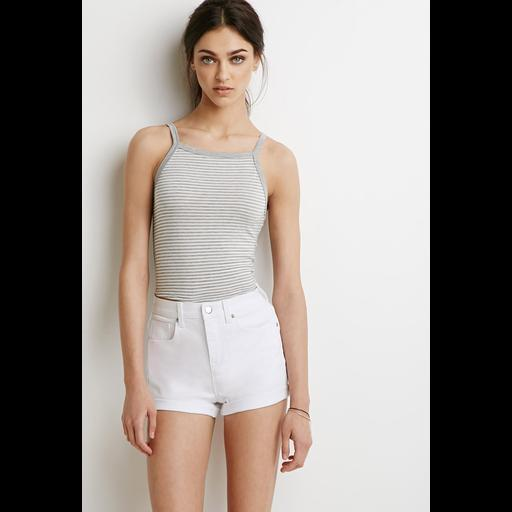

In [13]:
from PIL import Image

image = saffal_dataset['images'][0]
image

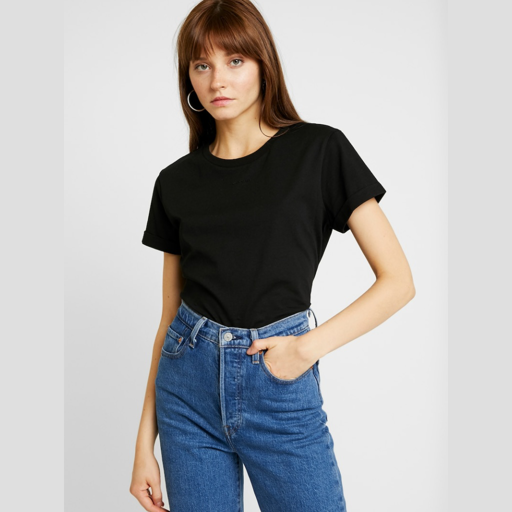

In [14]:
image = control_net_dataset['image'][0]
image

**Structuring the dataset for Pytorch model train**

In [15]:
import torch

# creating the dataset structure and model train based in
# https://github.com/dino-chiio/blip-vqa-finetune/blob/main/finetuning.py

class GenericFashionDataset(torch.utils.data.Dataset):
    """VQA (v2) dataset."""

    def __init__(self, dataset, processor):
        self.dataset = dataset
        self.processor = processor

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        question = self.dataset['questions'][idx]
        answer = self.dataset['answers'][idx]
        image_id = self.dataset['input_ids'][idx]
        try:
          image = self.dataset['images'][idx]
        except:
          image = self.dataset['image'][idx]
        text = question

        encoding = self.processor(image, text, padding="max_length", truncation=True, return_tensors="pt")
        labels = self.processor.tokenizer.encode(
            answer, max_length= 8, pad_to_max_length=True, return_tensors='pt'
        )
        encoding["labels"] = labels

        for k,v in encoding.items():  encoding[k] = v.squeeze()
        return encoding

In [16]:
from transformers import BlipProcessor
blip_processor = BlipProcessor.from_pretrained("Salesforce/blip-vqa-base")

preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [17]:
saffal_train_dataset = GenericFashionDataset(dataset=saffal_dataset, processor=blip_processor)
control_net_train_dataset = GenericFashionDataset(dataset=control_net_dataset, processor=blip_processor)

In [18]:
from torch.utils.data import DataLoader

batch_size = 2

saffal_train_dataloader = DataLoader(saffal_train_dataset, batch_size=batch_size, shuffle=False, pin_memory=True)
control_net_train_dataloader = DataLoader(control_net_train_dataset, batch_size=batch_size, shuffle=False, pin_memory=True)

# **Model Train**


deepFashion-with-masks**

In [19]:
from transformers import BlipForQuestionAnswering

blip_model = BlipForQuestionAnswering.from_pretrained("Salesforce/blip-vqa-base")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
blip_model.to(device)

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.54G [00:00<?, ?B/s]

BlipForQuestionAnswering(
  (vision_model): BlipVisionModel(
    (embeddings): BlipVisionEmbeddings(
      (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (encoder): BlipEncoder(
      (layers): ModuleList(
        (0-11): 12 x BlipEncoderLayer(
          (self_attn): BlipAttention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=768, out_features=2304, bias=True)
            (projection): Linear(in_features=768, out_features=768, bias=True)
          )
          (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): BlipMLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=768, out_features=3072, bias=True)
            (fc2): Linear(in_features=3072, out_features=768, bias=True)
          )
          (layer_norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
      )
    )
    (post_layernorm): LayerNorm((768,), eps=1e-05, e

In [20]:
def train_model(data_loader, model, num_epochs=50, patience=5):
  optimizer = torch.optim.AdamW(model.parameters(), lr=0.01)
  scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9, last_epoch=-1, verbose=False)

  information = []
  scaler = torch.cuda.amp.GradScaler()

  for epoch in range(num_epochs):
      epoch_loss = 0
      model.train()
      for idx, batch in zip(tqdm(range(len(data_loader)), desc='Training batch: ...'), data_loader):
          input_ids = batch.pop('input_ids').to(device)
          pixel_values = batch.pop('pixel_values').to(device)
          labels = batch.pop('labels').to(device)

          with torch.amp.autocast(device_type='cuda', dtype=torch.float16):
              outputs = model(input_ids=input_ids,
                          pixel_values=pixel_values,
                          labels=labels)

          loss = outputs.loss
          epoch_loss += loss.item()
          optimizer.zero_grad()

          scaler.scale(loss).backward()
          scaler.step(optimizer)
          scaler.update()

      information.append((epoch_loss/len(saffal_train_dataloader), optimizer.param_groups[0]["lr"]))
      print("Epoch: {} - Training loss: {} - LR: {}".format(epoch+1, epoch_loss/len(saffal_train_dataloader), optimizer.param_groups[0]["lr"]))
      scheduler.step()
  return model, information


**Training a model for Saffal Dataset**

In [21]:
trained_model, information = train_model(saffal_train_dataloader, blip_model, num_epochs=10)

Training batch: ...:   0%|          | 0/100 [00:00<?, ?it/s]Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
We strongly recommend passing in an `at

Epoch: 1 - Training loss: 5.658476760387421 - LR: 0.01


Training batch: ...: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]


Epoch: 2 - Training loss: 3.1925839018821716 - LR: 0.009000000000000001


Training batch: ...: 100%|██████████| 100/100 [01:24<00:00,  1.18it/s]


Epoch: 3 - Training loss: 3.155559871196747 - LR: 0.008100000000000001


Training batch: ...: 100%|██████████| 100/100 [01:22<00:00,  1.21it/s]


Epoch: 4 - Training loss: 3.142025423049927 - LR: 0.007290000000000001


Training batch: ...: 100%|██████████| 100/100 [01:24<00:00,  1.19it/s]


Epoch: 5 - Training loss: 3.1323040342330932 - LR: 0.006561000000000002


Training batch: ...: 100%|██████████| 100/100 [01:24<00:00,  1.19it/s]


Epoch: 6 - Training loss: 3.1232139563560484 - LR: 0.005904900000000002


Training batch: ...: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]


Epoch: 7 - Training loss: 3.117178864479065 - LR: 0.005314410000000002


Training batch: ...: 100%|██████████| 100/100 [01:23<00:00,  1.19it/s]


Epoch: 8 - Training loss: 3.1106951570510866 - LR: 0.004782969000000002


Training batch: ...: 100%|██████████| 100/100 [01:23<00:00,  1.19it/s]


Epoch: 9 - Training loss: 3.1060611414909363 - LR: 0.004304672100000002


Training batch: ...: 100%|██████████| 100/100 [01:22<00:00,  1.21it/s]

Epoch: 10 - Training loss: 3.1022395157814024 - LR: 0.003874204890000002


In [22]:
import pickle as pk

model_path = "/content/drive/MyDrive/Hvar/saffal_fashion_model.pt"
trained_model.save_pretrained(model_path, from_pt=True) #saving in the drive

results_path = "/content/drive/MyDrive/Hvar/saffal_fashion_model_train.pkl"
pk.dump(information, open(results_path, "wb"))

**Pusing model to hugging face**

In [23]:
model_repo_name = "wiusdy/blip_pretrained_saffal_fashion_finetuning"
trained_model.push_to_hub(model_repo_name)

model.safetensors:   0%|          | 0.00/1.54G [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/wiusdy/blip_pretrained_saffal_fashion_finetuning/commit/7633d5f0bfe4527756efb12fdb644dd1d1eaf152', commit_message='Upload BlipForQuestionAnswering', commit_description='', oid='7633d5f0bfe4527756efb12fdb644dd1d1eaf152', pr_url=None, pr_revision=None, pr_num=None)

**Training a dataset for Control Net dataset**

In [24]:
trained_model, information = train_model(control_net_train_dataloader, blip_model, num_epochs=10)

Training batch: ...:   0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
Training batch: ...: 100%|██████████| 100/100 [04:30<00:00,  2.70s/it]


Epoch: 1 - Training loss: 2.5326964044570923 - LR: 0.01


Training batch: ...: 100%|██████████| 100/100 [04:28<00:00,  2.69s/it]


Epoch: 2 - Training loss: 2.4434747457504273 - LR: 0.009000000000000001


Training batch: ...: 100%|██████████| 100/100 [04:30<00:00,  2.70s/it]


Epoch: 3 - Training loss: 2.430669367313385 - LR: 0.008100000000000001


Training batch: ...: 100%|██████████| 100/100 [04:29<00:00,  2.69s/it]


Epoch: 4 - Training loss: 2.423789961338043 - LR: 0.007290000000000001


Training batch: ...: 100%|██████████| 100/100 [04:29<00:00,  2.69s/it]


Epoch: 5 - Training loss: 2.4196324443817137 - LR: 0.006561000000000002


Training batch: ...: 100%|██████████| 100/100 [04:28<00:00,  2.69s/it]


Epoch: 6 - Training loss: 2.4172612118721006 - LR: 0.005904900000000002


Training batch: ...: 100%|██████████| 100/100 [04:28<00:00,  2.69s/it]


Epoch: 7 - Training loss: 2.4149822282791136 - LR: 0.005314410000000002


Training batch: ...: 100%|██████████| 100/100 [04:28<00:00,  2.69s/it]


Epoch: 8 - Training loss: 2.41300767660141 - LR: 0.004782969000000002


Training batch: ...: 100%|██████████| 100/100 [04:28<00:00,  2.69s/it]


Epoch: 9 - Training loss: 2.4113573694229125 - LR: 0.004304672100000002


Training batch: ...: 100%|██████████| 100/100 [04:27<00:00,  2.68s/it]

Epoch: 10 - Training loss: 2.4096216678619387 - LR: 0.003874204890000002


In [25]:
model_path = "/content/drive/MyDrive/Hvar/control_net_fashion_model.pt"
trained_model.save_pretrained(model_path, from_pt=True) #saving in the drive

results_path = "/content/drive/MyDrive/Hvar/control_net_fashion_model_train.pkl"
pk.dump(information, open(results_path, "wb"))

**Pushing model to hugging face**

In [26]:
model_repo_name = "wiusdy/blip_pretrained_control_net_fashion_finetuning"
trained_model.push_to_hub(model_repo_name)

model.safetensors:   0%|          | 0.00/1.54G [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/wiusdy/blip_pretrained_control_net_fashion_finetuning/commit/d223d489f61bd203a45a987cba3bade78d74a5f7', commit_message='Upload BlipForQuestionAnswering', commit_description='', oid='d223d489f61bd203a45a987cba3bade78d74a5f7', pr_url=None, pr_revision=None, pr_num=None)